*Please use your own API key from OpenWeather in order to run this script.

Observable Trends
- The cities near where the latitude coordinates are near 0, the hotter the temperatures are. Cities farther away from 0 are colder.
- There seems to be no correlation between cloudiness and latitude coordinates.
- There also seems to be no real correlation between wind speed and latitude coordinates.
- Humidity also has no correlation to latitude coordinates.
- There also seems to be a slight slope downward in humidity when the temperature gets higher.


In [1]:
#Place dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from pprint import pprint

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy


In [2]:
#Create cities dataframe to store values and future weather data
cities_df = pd.DataFrame()

cities_df['City'] = ""
cities_df['Country'] = ""
cities_df['Lat'] = np.random.uniform(low=-90.000, high=90.000, size=1500)
cities_df['Lng'] = np.random.uniform(low=-180.000, high=180.000, size=1500)

for index, row in cities_df.iterrows():
    lat = row['Lat']
    lng = row['Lng']
    cities_df.set_value(index, 'City', citipy.nearest_city(lat, lng).city_name)
    cities_df.set_value(index, 'Country', citipy.nearest_city(lat, lng).country_code)

cities_df.head()

/anaconda3/envs/Pythondata/lib/python3.6/site-packages/ipykernel_launcher.py:12: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  if sys.path[0] == '':
/anaconda3/envs/Pythondata/lib/python3.6/site-packages/ipykernel_launcher.py:13: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  del sys.path[0]


,City,Country,Lat,Lng
0,coquimbo,cl,-29.974620,-80.041354
1,guerrero negro,mx,19.918569,-124.399105
2,tiksi,ru,74.300007,124.196705
3,palabuhanratu,id,-11.744803,103.185451
4,cayenne,gf,11.747615,-41.084884


In [3]:
#Check length of output
len(cities_df)

1500

In [4]:
#Drop any duplicates
cities_df = cities_df.drop_duplicates(["City", "Country"])
cities_df.head()

,City,Country,Lat,Lng
0,coquimbo,cl,-29.974620,-80.041354
1,guerrero negro,mx,19.918569,-124.399105
2,tiksi,ru,74.300007,124.196705
3,palabuhanratu,id,-11.744803,103.185451
4,cayenne,gf,11.747615,-41.084884


In [5]:
#Check length of dataset now
len(cities_df)

620

In [6]:
#Create new dataframe with new columns
cities = pd.DataFrame(cities_df['City'])
cities['Country'] = cities_df['Country']
cities.head()

,City,Country
0,coquimbo,cl
1,guerrero negro,mx
2,tiksi,ru
3,palabuhanratu,id
4,cayenne,gf


In [7]:
#Confirm new datadrame is the same amount of rows
len(cities)

620

In [8]:
#Add new columns to the dataframe
cities['Date']=""
cities['Humidity']=""
cities['Cloudiness'] = ""
cities['Lat']= ""
cities['Lng'] = ""
cities['Max Temp'] = ""
cities['Wind Speed'] = ""
cities.head()

,City,Country,Date,Humidity,Cloudiness,Lat,Lng,Max Temp,Wind Speed
0,coquimbo,cl,,,,,,,
1,guerrero negro,mx,,,,,,,
2,tiksi,ru,,,,,,,
3,palabuhanratu,id,,,,,,,
4,cayenne,gf,,,,,,,


In [9]:
#Create the URL
url = "http://api.openweathermap.org/data/2.5/weather?q="
units = "&units=imperial"
counter = 0


In [10]:
#Iterate through the dataframe gathering weather data from the website's API.

for index,row in cities.iterrows():
    city = row['City']
    country = row['Country']
    counter += 1
    query_url = url + city + "," + country + units + "&appid=" + api_key
    
    response = requests.get(query_url)
    weather_data = response.json()
    #pprint(cityweather)

    try:
        print(f"This is city#: {counter}")
        print(f"This is: {row['City']}" )
        print(f"This is the requested URL: {query_url}")
        
        cities.set_value(index, "Date", int(weather_data['dt']))
        cities.set_value(index, "Humidity", float(weather_data['main']['humidity']))
        cities.set_value(index, "Cloudiness", float(weather_data['clouds']['all']))
        cities.set_value(index, "Lat", float(weather_data['coord']['lat']))
        cities.set_value(index, "Lng", float(weather_data['coord']['lon']))
        cities.set_value(index, "Max Temp", float(weather_data['main']['temp_max']))
        cities.set_value(index, "Wind Speed", float(weather_data['wind']['speed']))
    except:
        print(f"This is city#: {counter}")
        print(f"**Weather data does not exist for {row['City']}, {row['Country']}")
        continue

    

This is city#: 1
This is: coquimbo
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?q=coquimbo,cl&units=imperial&appid=5d38b1169ff26a99bf7303a31dce9478
This is city#: 2
This is: guerrero negro
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?q=guerrero negro,mx&units=imperial&appid=5d38b1169ff26a99bf7303a31dce9478


/anaconda3/envs/Pythondata/lib/python3.6/site-packages/ipykernel_launcher.py:18: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/anaconda3/envs/Pythondata/lib/python3.6/site-packages/ipykernel_launcher.py:19: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/anaconda3/envs/Pythondata/lib/python3.6/site-packages/ipykernel_launcher.py:20: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/anaconda3/envs/Pythondata/lib/python3.6/site-packages/ipykernel_launcher.py:21: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/anaconda3/envs/Pythondata/lib/python3.6/site-packages/ipykernel_launcher.py:22: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[

This is city#: 3
This is: tiksi
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?q=tiksi,ru&units=imperial&appid=5d38b1169ff26a99bf7303a31dce9478
This is city#: 4
This is: palabuhanratu
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?q=palabuhanratu,id&units=imperial&appid=5d38b1169ff26a99bf7303a31dce9478
This is city#: 4
**Weather data does not exist for palabuhanratu, id
This is city#: 5
This is: cayenne
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?q=cayenne,gf&units=imperial&appid=5d38b1169ff26a99bf7303a31dce9478
This is city#: 6
This is: dikson
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?q=dikson,ru&units=imperial&appid=5d38b1169ff26a99bf7303a31dce9478
This is city#: 7
This is: waitati
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?q=waitati,nz&units=imperial&appid=5d38b1169ff26a99bf7303a31dce9478
This is city#: 8
This is: albany
This is the reque

This is city#: 47
This is: anloga
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?q=anloga,gh&units=imperial&appid=5d38b1169ff26a99bf7303a31dce9478
This is city#: 48
This is: kahului
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?q=kahului,us&units=imperial&appid=5d38b1169ff26a99bf7303a31dce9478
This is city#: 49
This is: saint anthony
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?q=saint anthony,ca&units=imperial&appid=5d38b1169ff26a99bf7303a31dce9478
This is city#: 49
**Weather data does not exist for saint anthony, ca
This is city#: 50
This is: corumba
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?q=corumba,br&units=imperial&appid=5d38b1169ff26a99bf7303a31dce9478
This is city#: 51
This is: bluff
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?q=bluff,nz&units=imperial&appid=5d38b1169ff26a99bf7303a31dce9478
This is city#: 52
This is: kuminskiy
This is

This is city#: 92
This is: ilulissat
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?q=ilulissat,gl&units=imperial&appid=5d38b1169ff26a99bf7303a31dce9478
This is city#: 93
This is: punta arenas
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?q=punta arenas,cl&units=imperial&appid=5d38b1169ff26a99bf7303a31dce9478
This is city#: 94
This is: qandahar
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?q=qandahar,af&units=imperial&appid=5d38b1169ff26a99bf7303a31dce9478
This is city#: 94
**Weather data does not exist for qandahar, af
This is city#: 95
This is: tazmalt
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?q=tazmalt,dz&units=imperial&appid=5d38b1169ff26a99bf7303a31dce9478
This is city#: 96
This is: atuona
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?q=atuona,pf&units=imperial&appid=5d38b1169ff26a99bf7303a31dce9478
This is city#: 97
This is: krasnoselkup
T

This is city#: 137
This is: mar del plata
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?q=mar del plata,ar&units=imperial&appid=5d38b1169ff26a99bf7303a31dce9478
This is city#: 138
This is: andenes
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?q=andenes,no&units=imperial&appid=5d38b1169ff26a99bf7303a31dce9478
This is city#: 139
This is: port hawkesbury
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?q=port hawkesbury,ca&units=imperial&appid=5d38b1169ff26a99bf7303a31dce9478
This is city#: 140
This is: asau
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?q=asau,tv&units=imperial&appid=5d38b1169ff26a99bf7303a31dce9478
This is city#: 140
**Weather data does not exist for asau, tv
This is city#: 141
This is: baiyin
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?q=baiyin,cn&units=imperial&appid=5d38b1169ff26a99bf7303a31dce9478
This is city#: 142
This is: taoud

This is city#: 183
This is: asosa
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?q=asosa,et&units=imperial&appid=5d38b1169ff26a99bf7303a31dce9478
This is city#: 184
This is: khasan
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?q=khasan,ru&units=imperial&appid=5d38b1169ff26a99bf7303a31dce9478
This is city#: 185
This is: chuy
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?q=chuy,uy&units=imperial&appid=5d38b1169ff26a99bf7303a31dce9478
This is city#: 186
This is: hilo
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?q=hilo,us&units=imperial&appid=5d38b1169ff26a99bf7303a31dce9478
This is city#: 187
This is: san juan
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?q=san juan,ar&units=imperial&appid=5d38b1169ff26a99bf7303a31dce9478
This is city#: 188
This is: yakeshi
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?q=yakeshi,cn&units=im

This is city#: 229
This is: lianran
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?q=lianran,cn&units=imperial&appid=5d38b1169ff26a99bf7303a31dce9478
This is city#: 230
This is: adamas
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?q=adamas,gr&units=imperial&appid=5d38b1169ff26a99bf7303a31dce9478
This is city#: 231
This is: hammerfest
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?q=hammerfest,no&units=imperial&appid=5d38b1169ff26a99bf7303a31dce9478
This is city#: 232
This is: petropavlovsk-kamchatskiy
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?q=petropavlovsk-kamchatskiy,ru&units=imperial&appid=5d38b1169ff26a99bf7303a31dce9478
This is city#: 233
This is: gurupa
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?q=gurupa,br&units=imperial&appid=5d38b1169ff26a99bf7303a31dce9478
This is city#: 233
**Weather data does not exist for gurupa, br
This is city#

This is city#: 274
This is: cumaribo
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?q=cumaribo,co&units=imperial&appid=5d38b1169ff26a99bf7303a31dce9478
This is city#: 274
**Weather data does not exist for cumaribo, co
This is city#: 275
This is: wangaratta
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?q=wangaratta,au&units=imperial&appid=5d38b1169ff26a99bf7303a31dce9478
This is city#: 276
This is: odda
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?q=odda,no&units=imperial&appid=5d38b1169ff26a99bf7303a31dce9478
This is city#: 277
This is: tacuarembo
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?q=tacuarembo,uy&units=imperial&appid=5d38b1169ff26a99bf7303a31dce9478
This is city#: 278
This is: amroha
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?q=amroha,in&units=imperial&appid=5d38b1169ff26a99bf7303a31dce9478
This is city#: 279
This is: kamaishi
This i

This is city#: 319
This is: dezful
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?q=dezful,ir&units=imperial&appid=5d38b1169ff26a99bf7303a31dce9478
This is city#: 320
This is: praya
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?q=praya,id&units=imperial&appid=5d38b1169ff26a99bf7303a31dce9478
This is city#: 321
This is: louisbourg
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?q=louisbourg,ca&units=imperial&appid=5d38b1169ff26a99bf7303a31dce9478
This is city#: 321
**Weather data does not exist for louisbourg, ca
This is city#: 322
This is: grand river south east
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?q=grand river south east,mu&units=imperial&appid=5d38b1169ff26a99bf7303a31dce9478
This is city#: 322
**Weather data does not exist for grand river south east, mu
This is city#: 323
This is: ancud
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?q=ancu

This is city#: 362
This is: brownwood
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?q=brownwood,us&units=imperial&appid=5d38b1169ff26a99bf7303a31dce9478
This is city#: 363
This is: dalvik
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?q=dalvik,is&units=imperial&appid=5d38b1169ff26a99bf7303a31dce9478
This is city#: 364
This is: aklavik
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?q=aklavik,ca&units=imperial&appid=5d38b1169ff26a99bf7303a31dce9478
This is city#: 365
This is: sao felix do xingu
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?q=sao felix do xingu,br&units=imperial&appid=5d38b1169ff26a99bf7303a31dce9478
This is city#: 366
This is: pemangkat
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?q=pemangkat,id&units=imperial&appid=5d38b1169ff26a99bf7303a31dce9478
This is city#: 366
**Weather data does not exist for pemangkat, id
This is city#: 367
T

This is city#: 407
This is: cochrane
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?q=cochrane,ca&units=imperial&appid=5d38b1169ff26a99bf7303a31dce9478
This is city#: 408
This is: rapid valley
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?q=rapid valley,us&units=imperial&appid=5d38b1169ff26a99bf7303a31dce9478
This is city#: 409
This is: khandyga
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?q=khandyga,ru&units=imperial&appid=5d38b1169ff26a99bf7303a31dce9478
This is city#: 410
This is: san luis
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?q=san luis,ar&units=imperial&appid=5d38b1169ff26a99bf7303a31dce9478
This is city#: 411
This is: soyo
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?q=soyo,ao&units=imperial&appid=5d38b1169ff26a99bf7303a31dce9478
This is city#: 412
This is: baykit
This is the requested URL: http://api.openweathermap.org/data/2.5/weat

This is city#: 452
This is: bahir dar
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?q=bahir dar,et&units=imperial&appid=5d38b1169ff26a99bf7303a31dce9478
This is city#: 453
This is: malacky
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?q=malacky,sk&units=imperial&appid=5d38b1169ff26a99bf7303a31dce9478
This is city#: 454
This is: kaspiysk
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?q=kaspiysk,ru&units=imperial&appid=5d38b1169ff26a99bf7303a31dce9478
This is city#: 455
This is: te anau
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?q=te anau,nz&units=imperial&appid=5d38b1169ff26a99bf7303a31dce9478
This is city#: 456
This is: ilinge
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?q=ilinge,za&units=imperial&appid=5d38b1169ff26a99bf7303a31dce9478
This is city#: 457
This is: mikulovice
This is the requested URL: http://api.openweathermap.org/data/2.5/weathe

This is city#: 497
This is: talcahuano
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?q=talcahuano,cl&units=imperial&appid=5d38b1169ff26a99bf7303a31dce9478
This is city#: 498
This is: kosh-agach
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?q=kosh-agach,ru&units=imperial&appid=5d38b1169ff26a99bf7303a31dce9478
This is city#: 499
This is: hami
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?q=hami,cn&units=imperial&appid=5d38b1169ff26a99bf7303a31dce9478
This is city#: 500
This is: port hueneme
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?q=port hueneme,us&units=imperial&appid=5d38b1169ff26a99bf7303a31dce9478
This is city#: 501
This is: egvekinot
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?q=egvekinot,ru&units=imperial&appid=5d38b1169ff26a99bf7303a31dce9478
This is city#: 502
This is: baoqing
This is the requested URL: http://api.openweathermap.org/da

This is city#: 540
This is: sheffield
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?q=sheffield,us&units=imperial&appid=5d38b1169ff26a99bf7303a31dce9478
This is city#: 541
This is: paamiut
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?q=paamiut,gl&units=imperial&appid=5d38b1169ff26a99bf7303a31dce9478
This is city#: 542
This is: arrigorriaga
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?q=arrigorriaga,es&units=imperial&appid=5d38b1169ff26a99bf7303a31dce9478
This is city#: 543
This is: samarai
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?q=samarai,pg&units=imperial&appid=5d38b1169ff26a99bf7303a31dce9478
This is city#: 544
This is: teahupoo
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?q=teahupoo,pf&units=imperial&appid=5d38b1169ff26a99bf7303a31dce9478
This is city#: 545
This is: arteaga
This is the requested URL: http://api.openweathermap.org/data/2

This is city#: 585
This is: vila franca do campo
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?q=vila franca do campo,pt&units=imperial&appid=5d38b1169ff26a99bf7303a31dce9478
This is city#: 586
This is: semnan
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?q=semnan,ir&units=imperial&appid=5d38b1169ff26a99bf7303a31dce9478
This is city#: 587
This is: henties bay
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?q=henties bay,na&units=imperial&appid=5d38b1169ff26a99bf7303a31dce9478
This is city#: 588
This is: requena
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?q=requena,es&units=imperial&appid=5d38b1169ff26a99bf7303a31dce9478
This is city#: 589
This is: christchurch
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?q=christchurch,nz&units=imperial&appid=5d38b1169ff26a99bf7303a31dce9478
This is city#: 590
This is: karacakoy
This is the requested URL: http://a

In [11]:
#Check that values populated
cities.head()

,City,Country,Date,Humidity,Cloudiness,Lat,Lng,Max Temp,Wind Speed
0,coquimbo,cl,1561573736,58,0,-29.95,-71.34,59,11.41
1,guerrero negro,mx,1561573736,82,100,27.97,-114.04,62.73,7.67
2,tiksi,ru,1561573736,59,0,71.64,128.87,58.77,8.7
3,palabuhanratu,id,,,,,,,
4,cayenne,gf,1561573736,83,75,4.94,-52.33,78.8,11.41


In [12]:
#Export to csv before I get locked out of OpenWeather again...
export_csv = cities.to_csv("cities.csv",header=True)



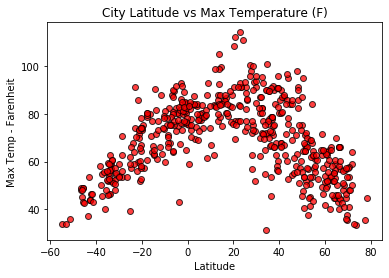

In [13]:
#Build the scatter plot for Latitude vs Temp
Latitude = pd.to_numeric(cities["Lat"])
Temp = pd.to_numeric(cities["Max Temp"])

plt.title("City Latitude vs Max Temperature (F)")
plt.xlabel("Latitude")
plt.ylabel("Max Temp - Farenheit")

plt.scatter(Latitude, Temp, marker="o", facecolors="red", edgecolors="black",
            alpha=0.75)

plt.savefig("LatVsTempScatter.png")
plt.show()



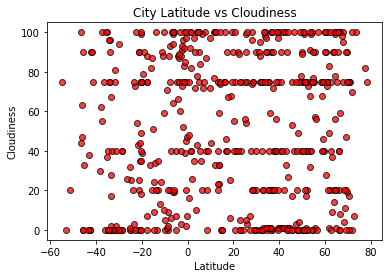

In [14]:
#Build the scatter plot for Latitude vs Cloudiness

cloudiness = pd.to_numeric(cities["Cloudiness"])

plt.title("City Latitude vs Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

plt.scatter(Latitude, cloudiness, marker="o", facecolors="red", edgecolors="black",
            alpha=0.75)

plt.savefig("LatVsCloudinessScatter.png")
plt.show()

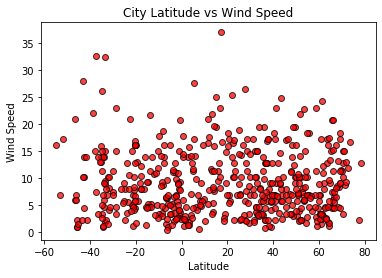

In [15]:
#Build the scatter plot for Latitude vs Wind Speed

wind = pd.to_numeric(cities["Wind Speed"])

plt.title("City Latitude vs Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

plt.scatter(Latitude, wind, marker="o", facecolors="red", edgecolors="black",
            alpha=0.75)

plt.savefig("LatVsWindSpeedScatter.png")
plt.show()